
--- Finding Optimal K for K-Means ---


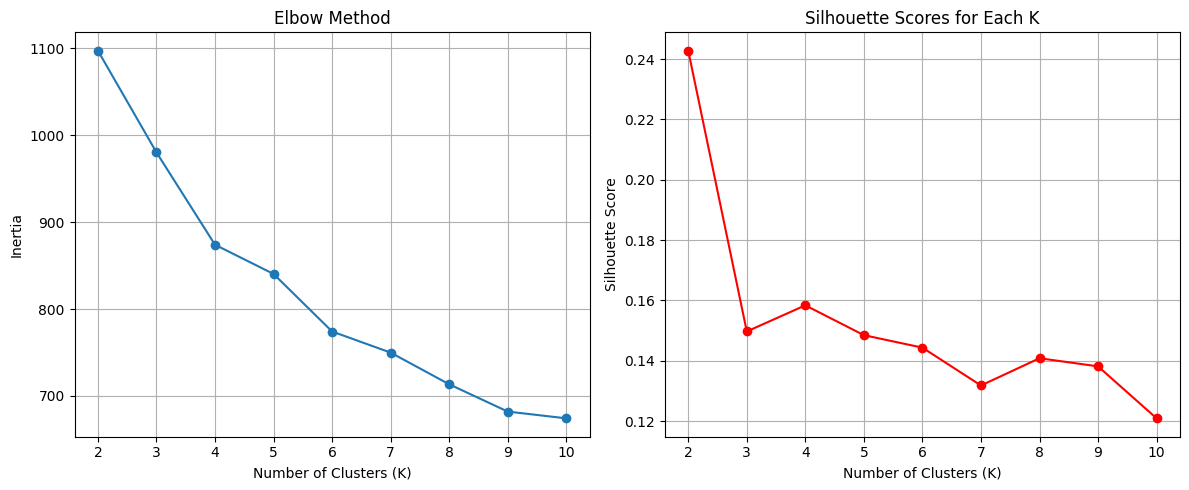

Optimal number of clusters (K) based on Silhouette Score: 2

--- Performing Hierarchical Clustering ---


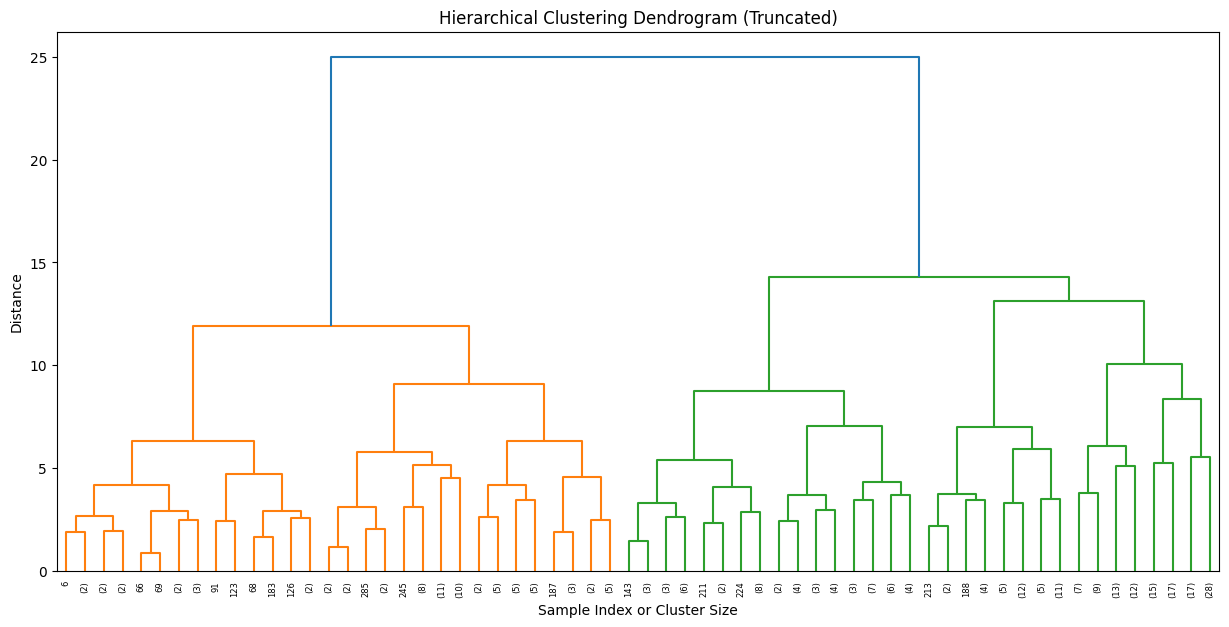


--- Clustering Evaluation Metrics ---
                     K-Means  Hierarchical
Silhouette Score       0.243         0.229
Adjusted Rand Index    0.316         0.252


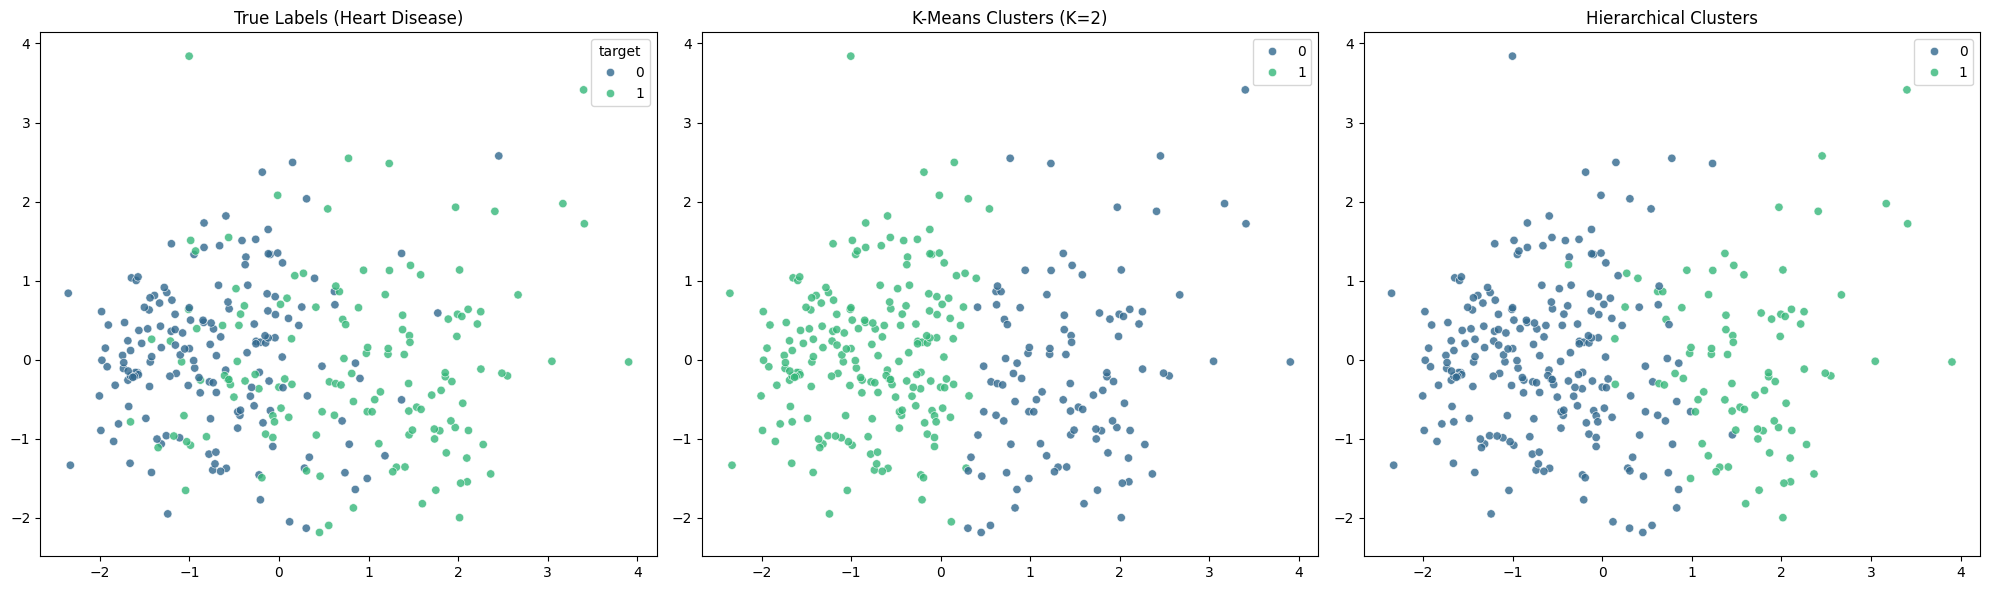


--- K-Means Clusters vs. Actual Labels ---


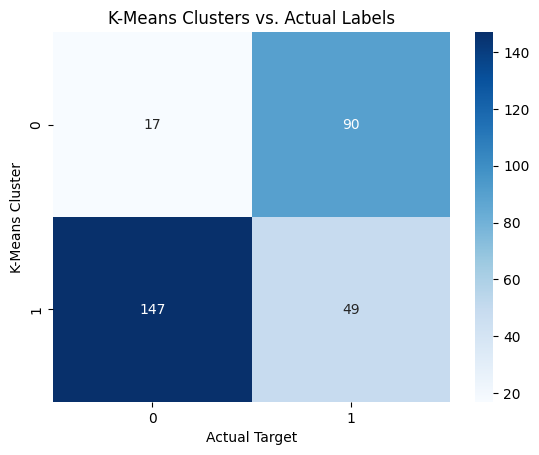

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

file_path = '../data/heart_disease_selected_features.csv'
df = pd.read_csv(file_path)

X = df.drop('target', axis=1)
y = df['target']

# optimal number of clusters (K)
print("\n--- Finding Optimal K for K-Means ---")
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Scores for Each K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# determine the best K using the highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K) based on Silhouette Score: {optimal_k}")

# Apply K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X)


#Dendrogram for visualization
print("\n--- Performing Hierarchical Clustering ---")
plt.figure(figsize=(15, 7))
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

# Apply Hierarchical Clustering with the same K for comparison
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X)



#Evaluate models with formal metrics
print("\n--- Clustering Evaluation Metrics ---")
kmeans_sil = silhouette_score(X, kmeans_labels)
hierarchical_sil = silhouette_score(X, hierarchical_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
hierarchical_ari = adjusted_rand_score(y, hierarchical_labels)

evaluation_df = pd.DataFrame({
    'K-Means': [kmeans_sil, kmeans_ari],
    'Hierarchical': [hierarchical_sil, hierarchical_ari]
}, index=['Silhouette Score', 'Adjusted Rand Index'])
print(evaluation_df.round(3))


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))


sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', ax=axes[0], alpha=0.8)
axes[0].set_title('True Labels (Heart Disease)')


sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', ax=axes[1], alpha=0.8)
axes[1].set_title(f'K-Means Clusters (K={optimal_k})')


sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='viridis', ax=axes[2], alpha=0.8)
axes[2].set_title('Hierarchical Clusters')

plt.tight_layout()
plt.show()


print("\n--- K-Means Clusters vs. Actual Labels ---")
crosstab = pd.crosstab(kmeans_labels, y)
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('K-Means Clusters vs. Actual Labels')
plt.xlabel('Actual Target')
plt.ylabel('K-Means Cluster')
plt.show()